<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/ML_DZ__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

Цель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Целевая переменная — пол спортсмена. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

Этапы работы:

1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics.
4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:
a) как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b) *может ли ROC-кривая проходить ниже диагонали?
Результат:

проведена оценка качества модели классификации;
реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.
Форма выполнения:

ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:

Jupyter Notebook/Google Colab
GitHub
файл athletes.csv
Срок выполнения: дедлайн приема решений на проверку
Рекомендации к выполнению:

Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

## 1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
pm = r'/content/drive/My Drive/ML/ML_DZ/ML_DZ_3/'

Mounted at /content/drive/


In [3]:
f_1 = 'athletes.csv'

In [14]:
df = pd.read_csv(f'{pm}{f_1}', sep = ',')
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Категориальные данные (object):

name (имя) - 11538 непустых значений

nationality (национальность) - 11538 непустых значений

sex (пол) - 11538 непустых значений

sport (вид спорта) - 11538 непустых значений

dob (дата рождения) - 11537 непустых значений (1 пропущенное значение)

Числовые данные:

height (рост) - float64, 11208 непустых значений (330 пропущенных значений)

weight (вес) - float64, 10879 непустых значений (659 пропущенных значений)

gold, silver, bronze (медали) - int64, по 11538 непустых значений в каждом

In [16]:
# Уникальные значения столбцов
print(df['name'].unique())
print(df['nationality'].unique())
print(df['sex'].unique())
print(df['dob'].unique())
print(df['height'].unique())
print(df['weight'].unique())
print(df['sport'].unique())
print(df['gold'].unique())
print(df['silver'].unique())
print(df['bronze'].unique())


['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 'MAD' 'GAB' 'SRI' 'LAO' 'MRI' 'PAR' 'IVB' 'GBS' 'TLS' 'MLI' 'SYR'
 'BOT' 'CHA' 'OMA' 'COD' '

In [17]:
# Проверка пропусков
print(df.isnull().sum())

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


In [18]:
# Подсчет пропусков
print("Пропуски в height:", df['height'].isnull().sum())
print("Пропуски в weight:", df['weight'].isnull().sum())

Пропуски в height: 330
Пропуски в weight: 659


In [19]:
# Заполнение пропусков медианным значением
height_median = df['height'].median()
weight_median = df['weight'].median()

df['height'].fillna(height_median, inplace=True)
df['weight'].fillna(weight_median, inplace=True)

/tmp/ipython-input-19-362534224.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(height_median, inplace=True)
/tmp/ipython-input-19-362534224.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [20]:
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [21]:
# Подсчет пропусков
print("Пропуски в height:", df['height'].isnull().sum())
print("Пропуски в weight:", df['weight'].isnull().sum())

Пропуски в height: 0
Пропуски в weight: 0


In [22]:
# Удаление столбцов данных не влияющих на целевую переменную
df.drop(['nationality', 'sport','id','name','dob','gold','silver','bronze'], axis=1, inplace=True)

In [ ]:
df

,sex,height,weight
0,male,1.72,64.0
1,female,1.68,56.0
2,male,1.98,79.0
3,male,1.83,80.0
4,male,1.81,71.0
...,...,...,...
11533,female,1.64,58.0
11534,female,1.73,63.0
11535,male,1.85,100.0
11536,male,1.60,56.0


In [23]:
# Кодируем целевую переменную
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [24]:
df

,sex,height,weight
0,1,1.72,64.0
1,0,1.68,56.0
2,1,1.98,79.0
3,1,1.83,80.0
4,1,1.81,71.0
...,...,...,...
11533,0,1.64,58.0
11534,0,1.73,63.0
11535,1,1.85,100.0
11536,1,1.60,56.0


In [25]:
# Проверка пропусков
print(df.isnull().sum())

sex       0
height    0
weight    0
dtype: int64


## 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Загрузка данных

X = df[['height', 'weight']]
Y = df['sex']

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Обучение модели (пример с логистической регрессией)

In [27]:
from sklearn.linear_model import LogisticRegression

# Обучение модели
model = LogisticRegression()
model.fit(X_train, Y_train)



LogisticRegression()

In [28]:
model.predict(X_test)[:5]

array([1, 1, 1, 1, 0])

In [29]:
predictions = model.predict_proba(X_test)

In [30]:
predictions[:5]

array([[0.30327459, 0.69672541],
       [0.31335947, 0.68664053],
       [0.0763678 , 0.9236322 ],
       [0.03238699, 0.96761301],
       [0.59303111, 0.40696889]])

In [31]:
model.score(X_train, Y_train)  # accuracy

0.7644637053087757

In [32]:
model.score(X_test, Y_test)

0.7603986135181976

## 3. Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics.

In [33]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [34]:
predictions[:,1]

array([0.69672541, 0.68664053, 0.9236322 , ..., 0.47007016, 0.15879177,
       0.94046342])

In [35]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [36]:
import matplotlib.pyplot as plt
import numpy as np

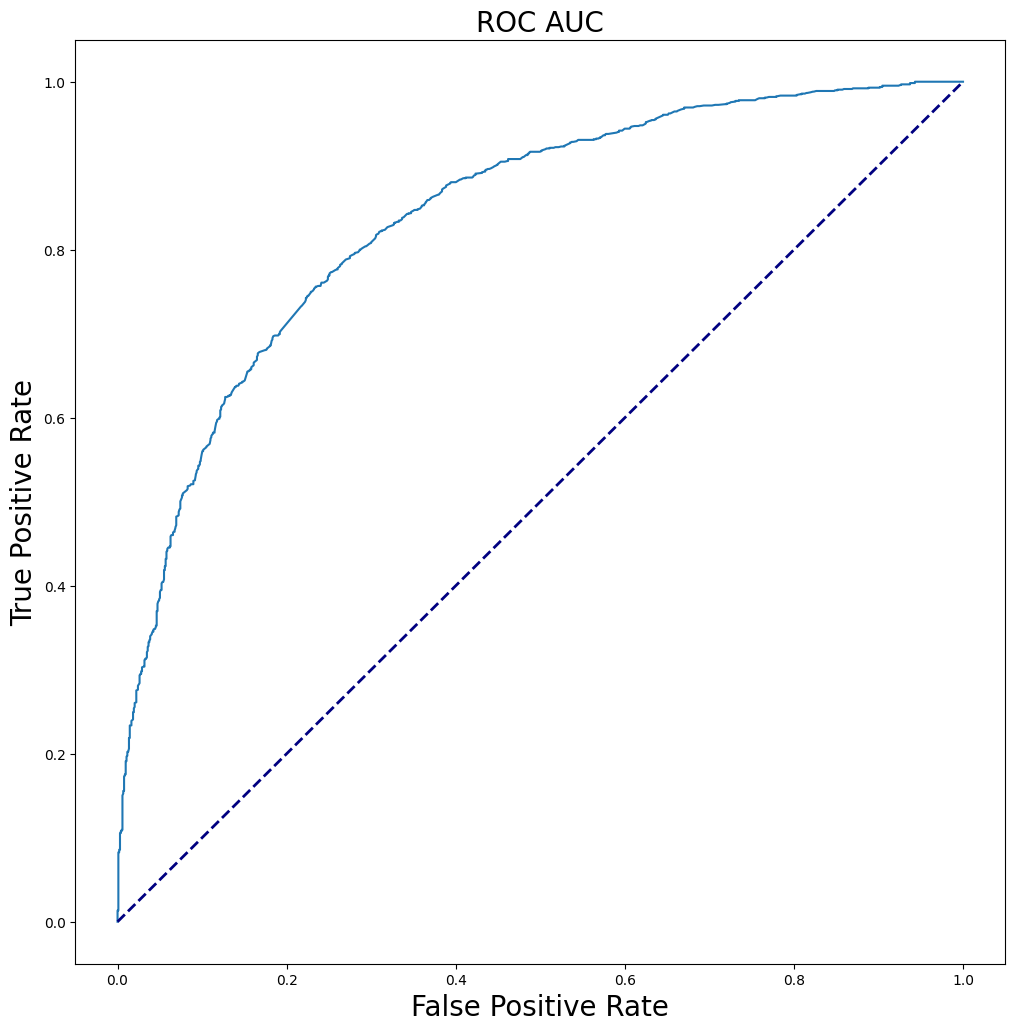

In [37]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
# Диагональная линия (случайная модель)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

## 4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics.

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(Y_test, predictions[:, 1]).round(2)

np.float64(0.84)

## 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [40]:
from numpy import arange
thresholds = arange(0, 1, 0.1)

#predictions определены выше
fprs = []
tprs = []
prs = []
res = []
pr_custom = []
for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 #по определению
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    res.append(recall)


## 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.


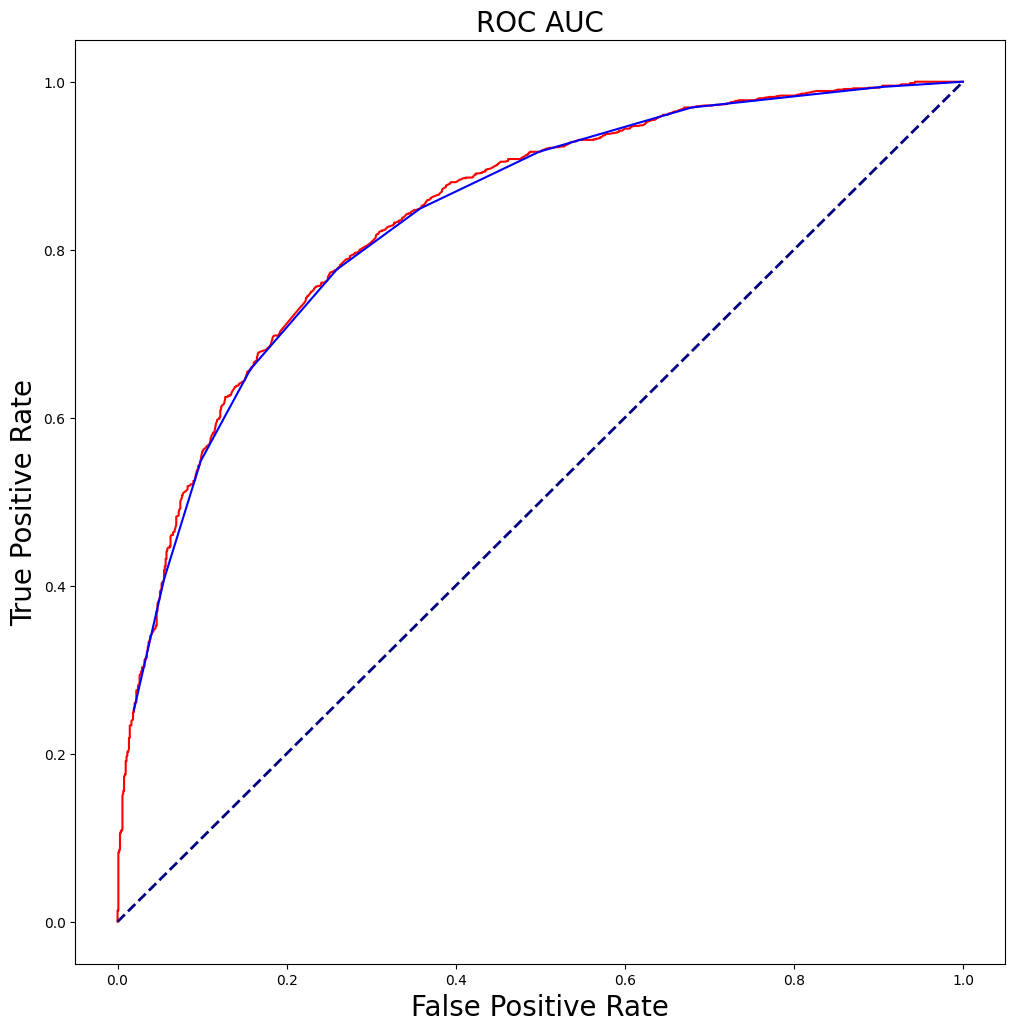

In [41]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color="red")
plt.plot(fprs, tprs, color="blue")
plt.title('ROC AUC', fontdict={'fontsize': 20})
# Диагональная линия (случайная модель)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

Графики построени ROC-кривых практически сливаются. Результат "ручного" подхода расчета метрик соответствует "библиотечному" подходу.

## 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

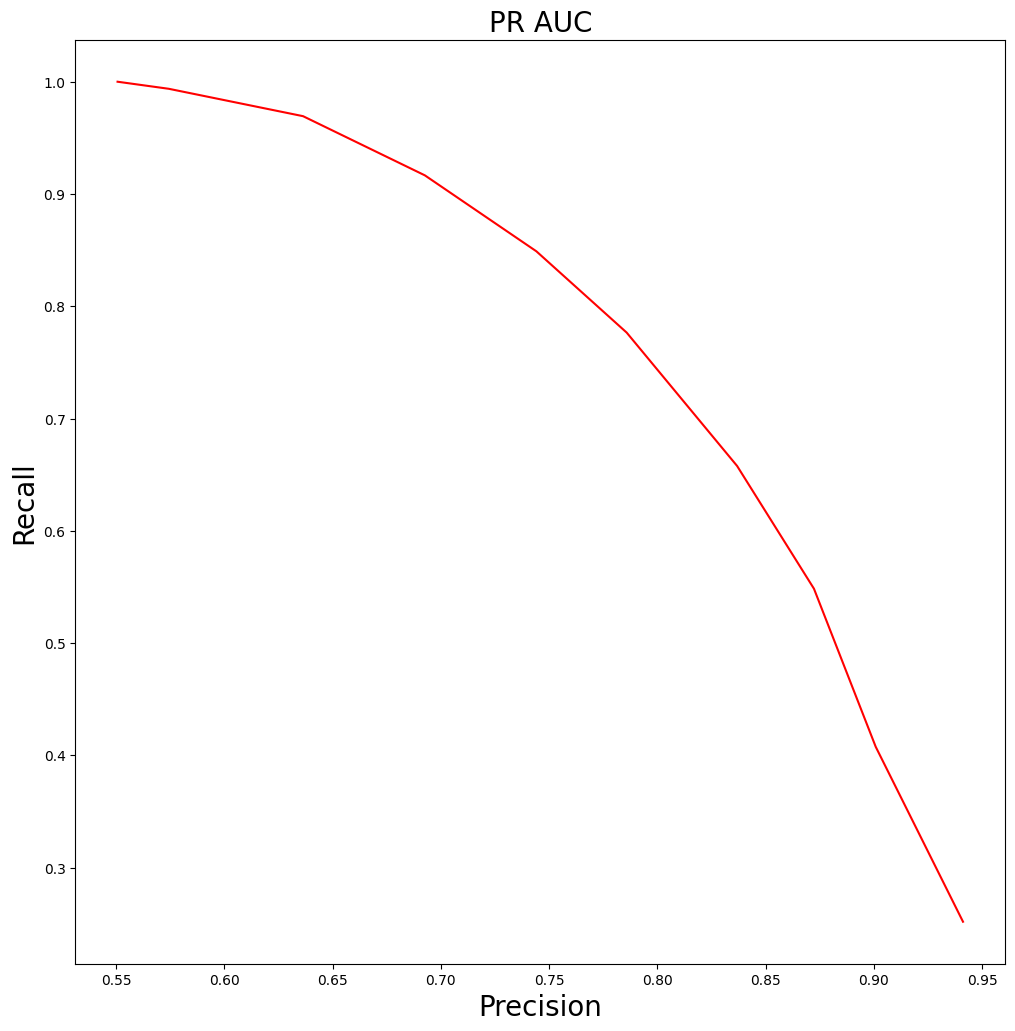

In [42]:
plt.figure(figsize=(12, 12))
plt.plot(prs, res, color="red")
plt.title('PR AUC', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.show()

## 8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.


In [43]:
#сортируем по возрастанию, чтобы считать от начала кривой
fprs.sort()
tprs.sort()
#кастомная метрика roc_auc - аналог roc_auc_score, очень приблизительно моделируем площадь фигуры как сумму фигур по шагам
custom_roc_auc = 0
prev_fpr = 0
prev_tpr = 0
for index in range(len(fprs)):
    if(index != 0):
        custom_roc_auc += ((tprs[index] - prev_tpr) * (fprs[index] - prev_fpr) / 2) + (tprs[index] * (fprs[index] - prev_fpr))
        prev_tpr = tprs[index]
        prev_fpr = fprs[index]
print(custom_roc_auc)

0.9109794412405815


## 9. Сформулируйте выводы по проделанной работе:
a) как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b) *может ли ROC-кривая проходить ниже диагонали?

## a)

ROC-кривая (Receiver Operating Characteristic) показывает соотношение между TPR (True Positive Rate) и FPR (False Positive Rate) при различных порогах классификации.

**Основные характеристики для оценки:**

**Расположение кривой:**

1.Чем ближе кривая к левому верхнему углу (точка (0,1)), тем лучше модель;

2. Кривая идеальной модели проходит по левому краю и верхнему краю графика;

3. Кривая случайной модели лежит на диагонали (AUC ≈ 0.5).

**AUC-ROC (площадь под кривой):**

1.Значения выше 0.9 считаются отличными;

2.Значения около 0.5 указывают на случайный результат;

3. Чем выше AUC, тем лучше способность модели ранжировать объекты.

Анализ Precision-Recall кривой
Precision-Recall кривая показывает баланс между точностью (Precision) и полнотой (Recall).

**Ключевые моменты для оценки:**

**Форма кривой:**

Высокая Precision при высоком Recall — идеальный результат;

Резкие падения Precision при росте Recall указывают на проблемы модели;

Стабильная кривая с высоким уровнем Precision и Recall — хороший знак.

**AUC PR-кривой:**

Большая площадь под кривой указывает на лучшее качество;

Важно учитывать контекст задачи (например, для несбалансированных данных).

**Совместный анализ кривых**
**При оценке модели следует учитывать:**

1.Сбалансированные данные:

Высокая AUC-ROC (>0.9);

Стабильная PR-кривая с высоким уровнем Precision и Recall;

2.Несбалансированные данные:

PR-кривая более информативна;

Нужно обращать внимание на поведение модели в области высоких Recall;

3.Практические выводы:

Если ROC-кривая близка к идеальной, но PR-кривая показывает низкие значения — проблема с несбалансированностью;

Низкий AUC-ROC при хорошей PR-кривой может указывать на специфичность задачи.

Вывод: Сравнение "библиотечного" и "ручного" подсчета графика и метрик TPR, PFR показывает, что они различаются незначительно.

Расчет метрики roc_auc_score и ее кастомного аналога,  несколько отличаются. Это обусловленно грубостью модели, применявшейся к кастомному расчету.

## b)
ROC-кривая всегда начинается в точке (0,0) и заканчивается в точке (1,1), но её траектория может быть разной:

1. Выше диагонали — модель работает лучше случайного угадывания;

2. На диагонали — модель не лучше случайного угадывания (AUC = 0.5);

3. Ниже диагонали — модель работает хуже случайного угадывания.